In [18]:
# Import
import numpy as np 
import matplotlib
%matplotlib inline
matplotlib.use('TKAgg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display
import scipy.integrate as integrate

In [6]:
#Params
alpha=2
X0=0.
sigma=1.
lda=1.
X=np.linspace(-np.pi/2,np.pi/2,500) #Space

# 1. Pour restreindre la dimension de notre espace de fonction, il est tout d'abord nécessaire de voir s'il est judicieux de se limiter à quelques termes dans le développement en série de Fourier

In [38]:
#Definition of the normal distribution
def gauss(X0=0,sigma=1):
	return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (X - X0)**2 / (2 * sigma**2) )

# Compute the coefficient of the Fourier decomposition
def a(n,sigma=1,x0=0,T=np.pi,borne1=-np.pi/2,borne2=np.pi/2):
	def fonction(x):
		return  np.cos(n*((2*np.pi)/T)*x)* (1/(sigma * np.sqrt(2 * np.pi))) * (np.exp( - (x - x0)**2 / (2 * sigma**2)))
	inte=integrate.quad(fonction,borne1,borne2)
	if n==0:
		return (1/np.pi)*inte[0]
	else :
		return (2/np.pi)*inte[0] 

def fourier(n,sigma=1):
	four=0*X 
	for i in range(n):
		four+=a(i,sigma)*np.cos(2*i*X)
	return four

Nous réalisons les affichages des approximations de la gaussienne pour différentes valeurs de sigma

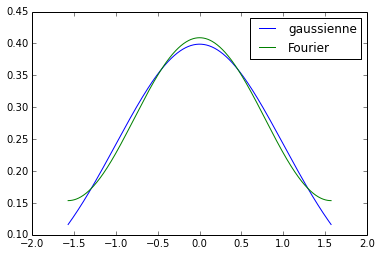

In [31]:
sigma=1
plt.plot(X,gauss(sigma=sigma),label="gaussienne")
plt.plot(X,fourier(2),label="Fourier")
plt.legend()
plt.show()

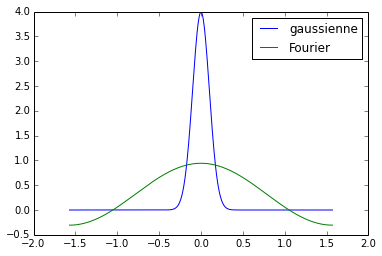

In [32]:
sigma=0.1
plt.plot(X,gauss(sigma=sigma),label="gaussienne")
plt.plot(X,fourier(2,sigma=sigma),label="Fourier")
plt.legend()
plt.show()

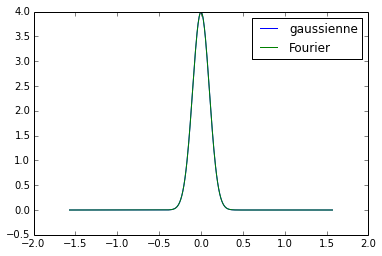

In [33]:
sigma=0.1
plt.plot(X,gauss(sigma=sigma),label="gaussienne")
plt.plot(X,fourier(20,sigma=sigma),label="Fourier")
plt.legend()
plt.show()

Remarques:
-> On constate (et c'est vérifié dans la théorie) qu'on peut approximer justement la gaussienne pour un nombre de termes de Fourier environ égal à 2*1/sigma.
-> Dans le cas de notre problème avec I, il faudra étendre la taille de notre base en fonction de l'extension spatial de I (lié à la diffusion dans les neurones)
-> A ce titre, il est souvent impossible de négliger la partie orthogonale de I 

# 2. Simulation des neural fields equations par différences finies (sans contrôle et avec theta=0)

Paramètres :

In [39]:
a0=a(0)
a1=a(1)
nbx=500
nbt=20
pasx=np.pi/nbx
T=1.
past=T/nbt
Vin=10.*gauss(0)+5.*gauss(np.pi/4,sigma=0.05)-8*gauss(np.pi/4.5,sigma=0.05)
a=0.5
tau=past/a

def S(x):
	return 1/(1+np.exp(-x))

Simulations :

In [40]:
V=Vin*np.ones([nbt,nbx])

for t in range(1,nbt):
	for j in range(0,nbx):
		xj=-np.pi/2+(j*pasx)
		inte=0
		for i in range(nbx):
			xi=-np.pi/2+(i*pasx)
			inte+=(a0+a1*np.cos(alpha*(xi-xj))*S(lda*V[t-1,i]))
		V[t,j]=V[t-1,j]+(past/tau)*(-V[t-1,j]+(1/np.pi)*pasx*inte)

Plot l'évolution des profils spatiaux dans le temps

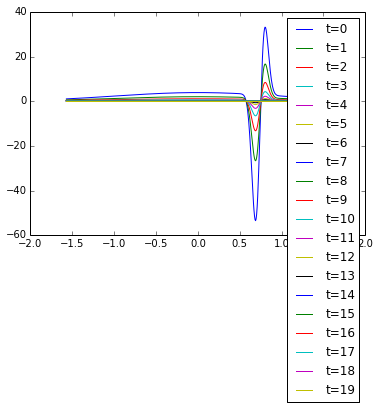

In [41]:
for time in range(0,nbt):
	plt.plot(X,V[time,:],label="t="+str(time))
plt.legend()
plt.show()

Animation

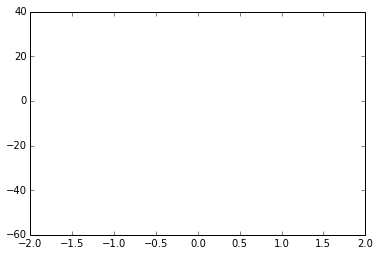

In [42]:
fig, ax = plt.subplots()
line, = ax.plot(X, V[0,:])

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(X))
    return line,

def animate(i):
    line.set_ydata(V[i,:])  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=1000, blit=True, save_count=None)

plt.show()

Remarques : 
-> On constate une décroissance exponentielle (ordre 1) vers une trajectoire limite qui est constante égale au terme constant de la décomposition de Fourier de J (à démontrer ??)